<a href="https://colab.research.google.com/github/DarioLankenau/AI_LogReg/blob/main/2do_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dario Jauregui A00827837
9/8/2022

# Implementación de un clasificador con **Regresión logística** para predecir el sexo de zarigüeya.

Del paquete DAAG R: "El datatset de la zarigüeya consta de nueve medidas morfométricas en cada una de las 104 zarigüeyas cola de cepillo de montaña, atrapadas en siete sitios desde el sur de Victoria hasta el centro de Queensland".

In [58]:
import pandas as pd # importar libreria
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn import datasets
import io
import joblib
import matplotlib.pyplot as plt
%pip install mlxtend --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import roc_curve, roc_auc_score

# Exploración de dataset

Variables en el dataset y su significado:

*   **case** : observation number.
*   **site** : The site number where the possum was trapped.
*   **Pop** : Population, either Vic (Victoria) or other (New South Wales or Queensland).
*   **sex** : Gender, either m (male) or f (female).
*   **age** : Age.
*   **hdlngth** : Head length, in mm.
*   **skullw** : Skull width, in mm.
*   **totlngth** : Total length, in cm.
*   **taill** : Tail length, in cm.
*   **footlgth** : foot length.
*   **earconch** : ear conch width.
*   **eye** :  eye width.
*   **chest** :  chest width.
*   **belly** : belly width.




In [60]:
df = pd.read_csv("possum.csv")

In [61]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [62]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [63]:
print("Null Values found: ", df.isnull().sum())
df = df.dropna(axis = 0)
df.shape

Null Values found:  case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


(101, 14)

In [64]:
print(df.Pop.unique())
print(df.sex.unique())


['Vic' 'other']
['m' 'f']


Cambiamos los valores categoricos a numericos

In [65]:
df.sex = df.sex.map({"m":1, "f":0})
df.Pop = df.Pop.map({"Vic":1, "other":0})

In [66]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Text(0.5, 1.0, 'Frecuencia de sexo')

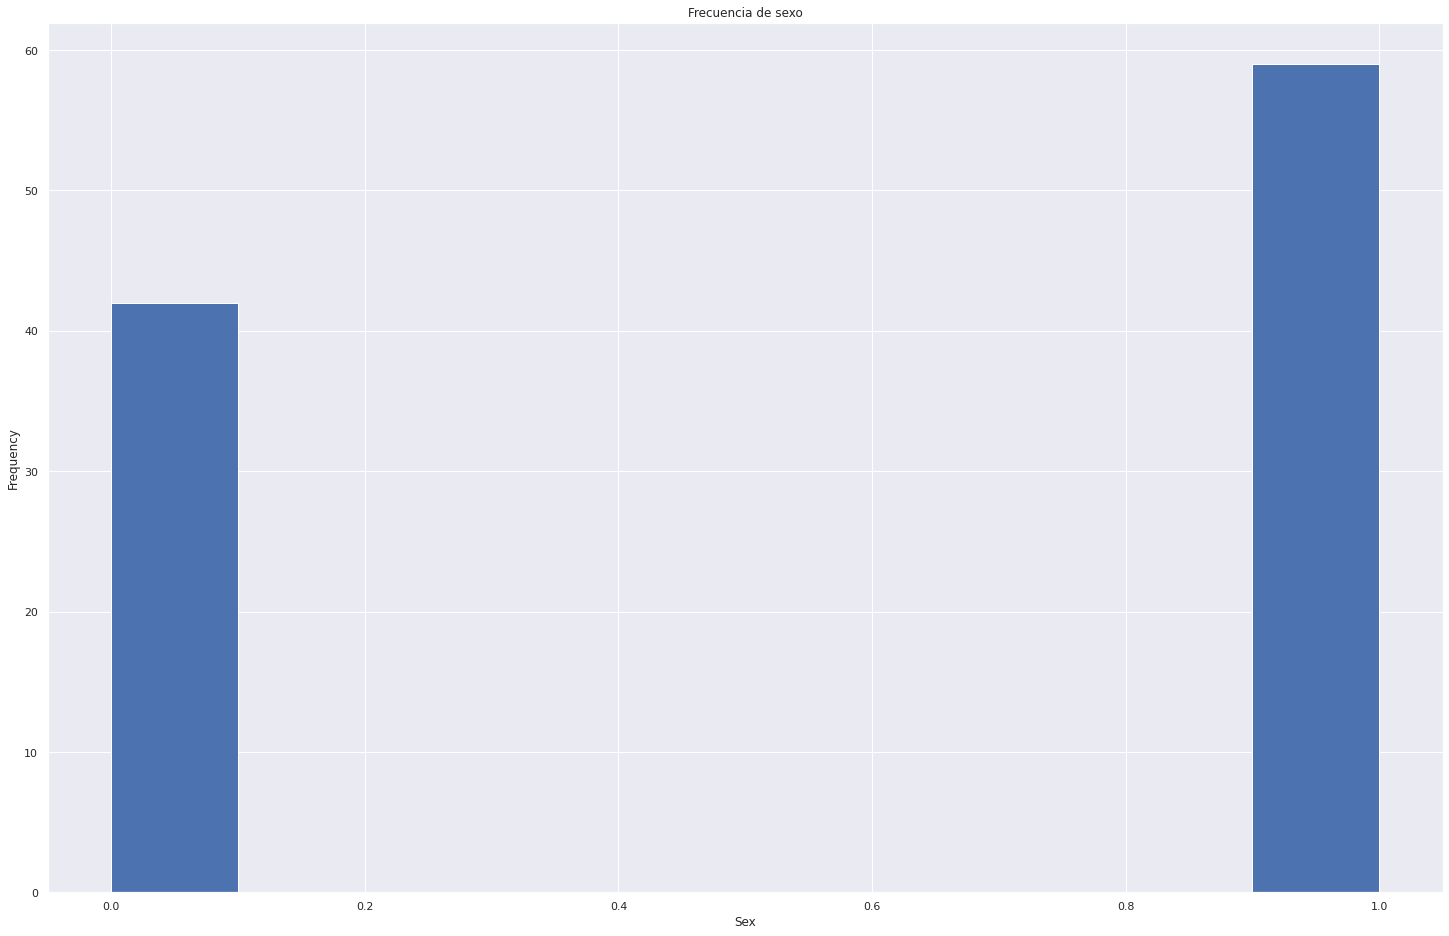

In [67]:
plt.hist(df.sex)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Frecuencia de sexo")

# Separamos el dataset en (Train/Test/Validation).

In [68]:
sex = df.sex
sex = sex.values
X = df[["site","Pop","hdlngth","skullw","totlngth","taill","footlgth","earconch","belly","eye","chest"]]
X = X.values

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, sex, test_size = 0.2, random_state = 7)

# Se genera el modelo

In [70]:
# get the rf object
lg_model = LogisticRegression(solver='newton-cg',random_state=16)


# fit the same base model
lg_model.fit(x_train, y_train)

# prediction
lg_pred = lg_model.predict(x_test)

# Predicciones

In [71]:
print("Valores de test: ", y_test)
print("Predicciones   : ", lg_pred)

Valores de test:  [1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1]
Predicciones   :  [1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1]


# Descripción de resultados; vemos que la precisión general se encuentra en 0.71 

In [72]:
from sklearn.metrics import classification_report
target_names = ['Male', 'Female']
print(classification_report(y_test, lg_pred, target_names=target_names))

              precision    recall  f1-score   support

        Male       0.67      0.50      0.57         8
      Female       0.73      0.85      0.79        13

    accuracy                           0.71        21
   macro avg       0.70      0.67      0.68        21
weighted avg       0.71      0.71      0.70        21



In [73]:
cf_matrix = confusion_matrix(y_test, lg_pred)

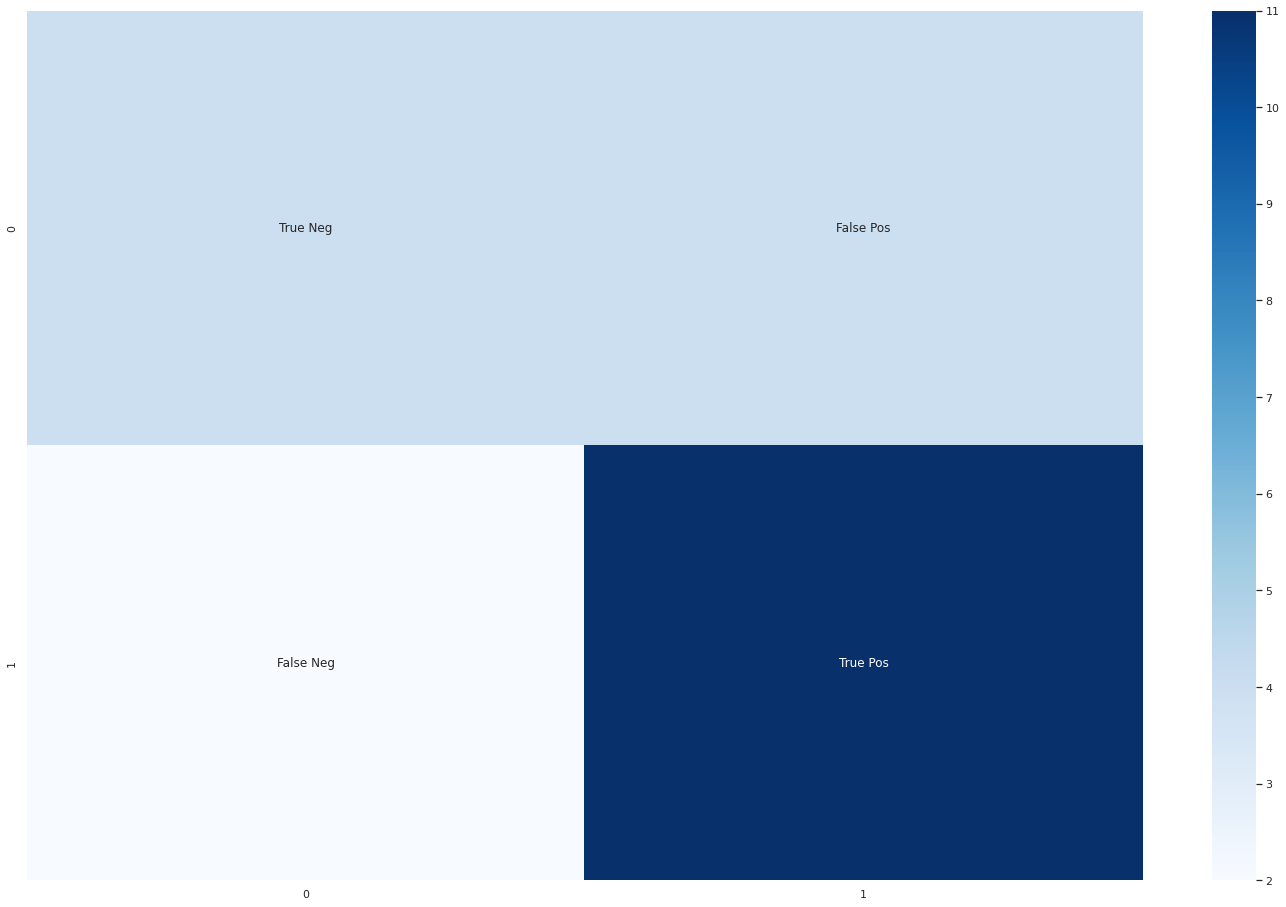

In [74]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Vemos que este modelo nos da valores falsos positivos al igual que verdaderos negativos.

# Realizamos una gráfica ROC




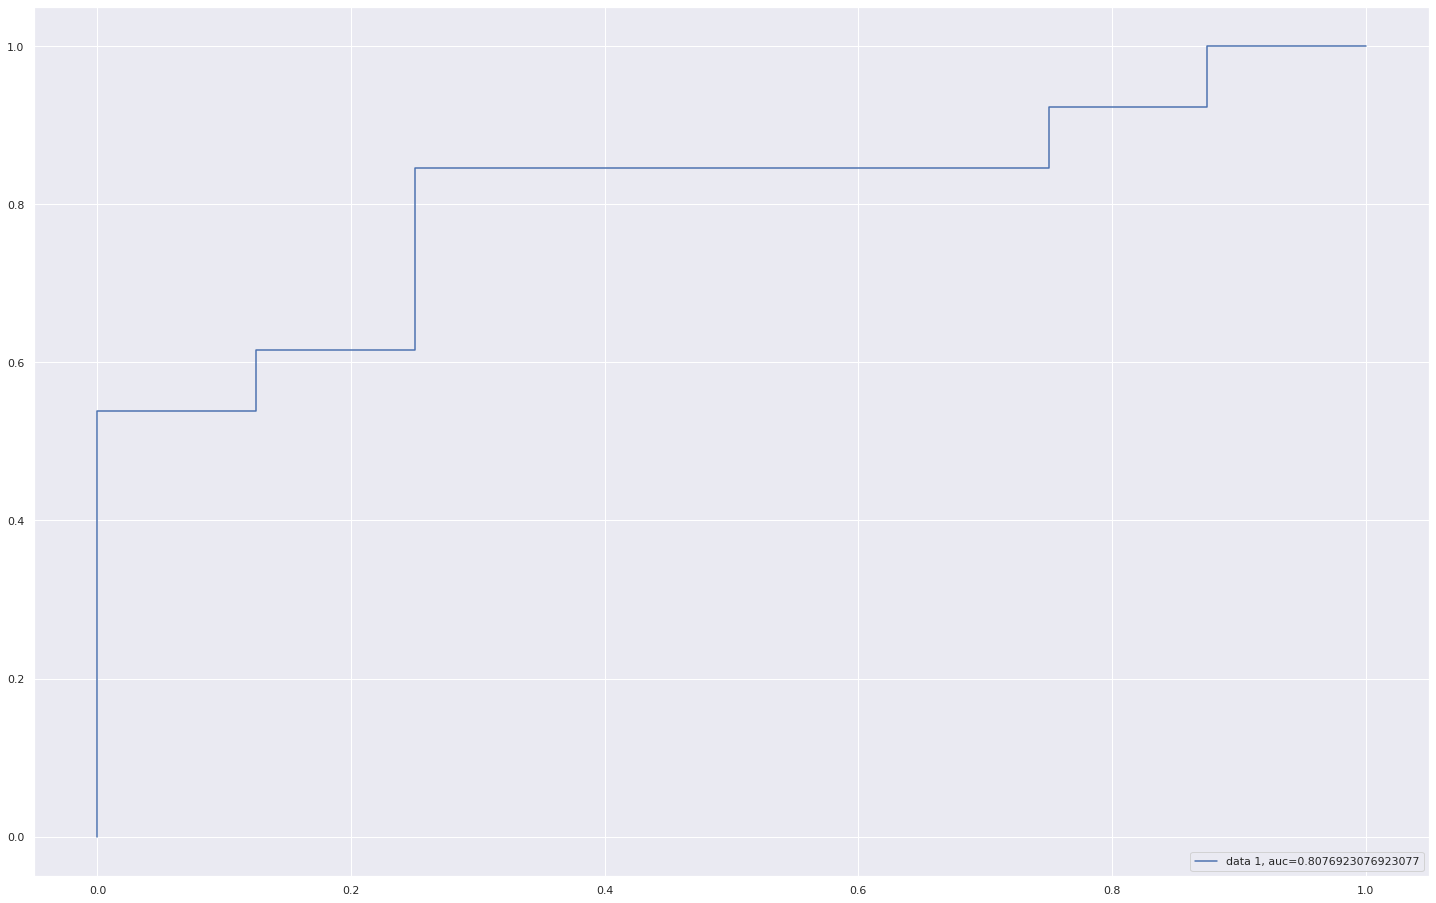

In [75]:
y_pred_proba = lg_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

La puntuación AUC para el caso es 0,80. La puntuación AUC 1 representa un clasificador perfecto y 0,5 representa un clasificador sin valor.

# Se calculan las medias de varianza y de bias encontradas en el modelo

In [76]:
mse, bias, variance = bias_variance_decomp(lg_model, x_train, y_train, x_test, y_test, 
                                           loss='mse', num_rounds=200, random_seed=None)
print("Average Bias : ", bias)
print("Average Variance : ", variance)

Average Bias :  0.1900583333333333
Average Variance :  0.14494166666666666


Vemos que existe un **bias alto relativo** en comparación con la varianza, más que nada debido a que estamos utilizando una regresión logística. El valor de la **varianza es relativamente poco**, ya que la suma de cuadrados es similar a diferentes datasets. Esto refleja que nuestro modelo dará buenas predicciones, más no excelentes. Además, refleja un **underfitting**, ya que el bias es alto en comparación con la varianza, lo que significa que el modelo no es lo suficientemente complejo como para capturar bien el patrón en los datos de entrenamiento y, por lo tanto, también sufre de bajo rendimiento en datos no vistos. 

# Mejora del modelo

Debido a que es regresión logística, realmente no se tienen hiperparámetros críticos para ajustar. (Gusarov, 2022). A veces, pueden ver diferencias útiles al modificar los diferentes solucionadores (solver). De los que se encuentran en scikit learn;  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']. En nuestro caso se probaron todos y ‘newton-cg’ nos dio el mejor resultado.

Uno de los otros parametros importantes para la mejora del modelo son la penalización (o regularización) que pretende reducir el error de generalización del modelo y pretende desincentivar y regular el overfitting. En nuestro caso, no tenemos overfitting, sino underfitting, por lo cual se descarta. Sin embargo, se modificó el dataset para mejorar nuestras predicciones.

Se realizó un GridSearch con ayuda de la librería de scikit learn para él tuneo de hiperparámetros; sin embargo, no mejoro el modelo. 




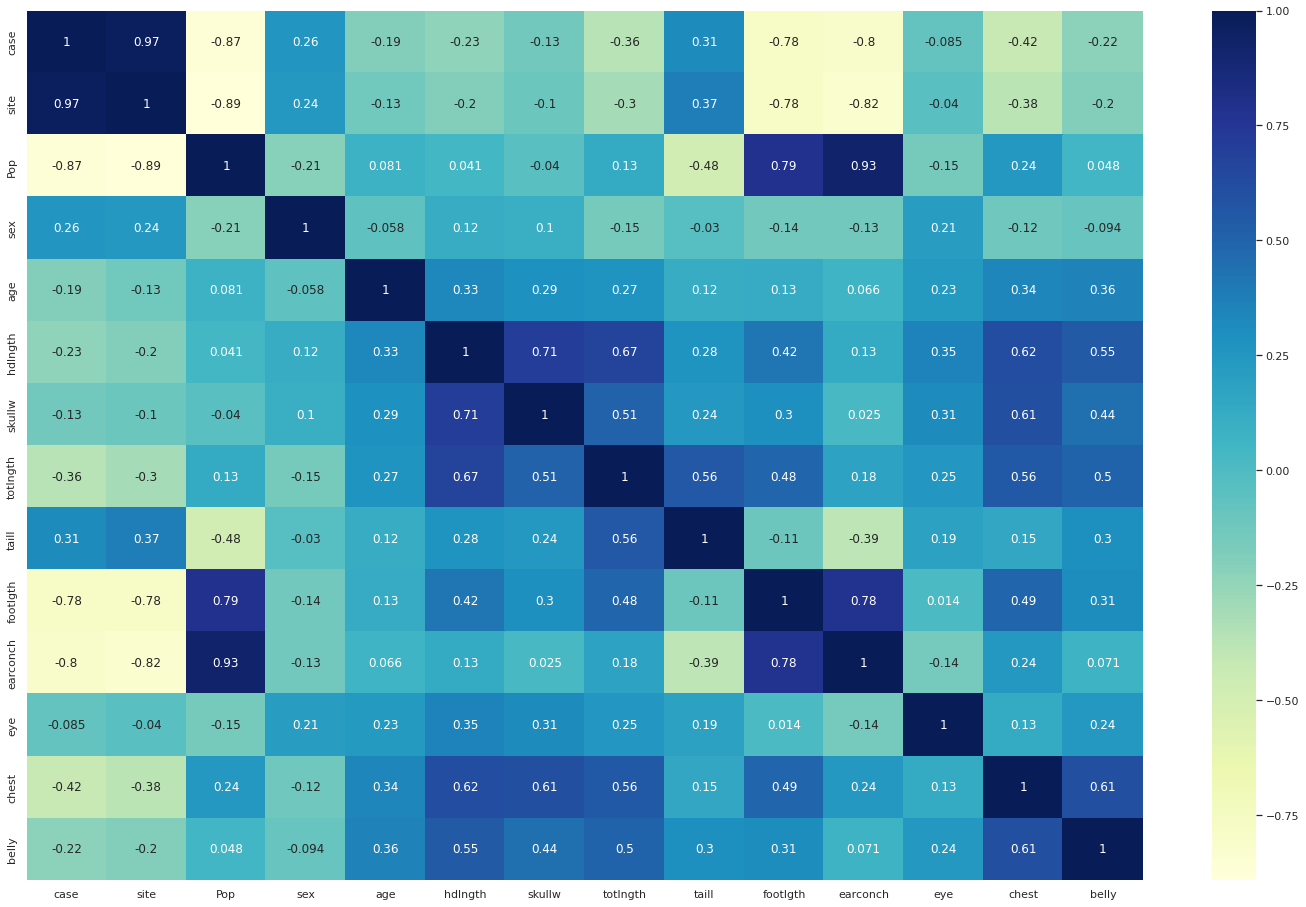

In [77]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

Removemos variables con poca correlación con respecto a la "y" (sexo). Por ejemplo las variables de taill, con un valor de -0.03 y belly con un valor de -0.09.

In [78]:
sex = df.sex
sex = sex.values
X_new = df[["site","Pop","hdlngth","skullw","totlngth","footlgth","earconch","eye","chest"]]
X_new = X_new.values

# Separamos el dataset en (Train/Test/Validation).

In [79]:
from sklearn.model_selection import train_test_split
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(X_new, sex, test_size = 0.2, random_state = 7)

# Se genera el modelo

In [80]:
# get the rf object
lg_model_final = LogisticRegression(solver='newton-cg',random_state=16)


# fit the same base model
lg_model_final.fit(x_new_train, y_new_train)

# prediction
lg_pred_final = lg_model_final.predict(x_new_test)

# Predicciones

In [81]:
print("Valores de test: ", y_new_test)
print("Predicciones   : ", lg_pred_final)

Valores de test:  [1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1]
Predicciones   :  [1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1]


# Descripción de resultados; vemos que la precisión general se encuentra en 0.81, una mejora de 10% en comparación al modelo anterior.

In [82]:
from sklearn.metrics import classification_report
target_names = ['Male', 'Female']
print(classification_report(y_new_test, lg_pred_final, target_names=target_names))

              precision    recall  f1-score   support

        Male       0.75      0.75      0.75         8
      Female       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



In [83]:
cf_matrix_new = confusion_matrix(y_new_test, lg_pred_final)

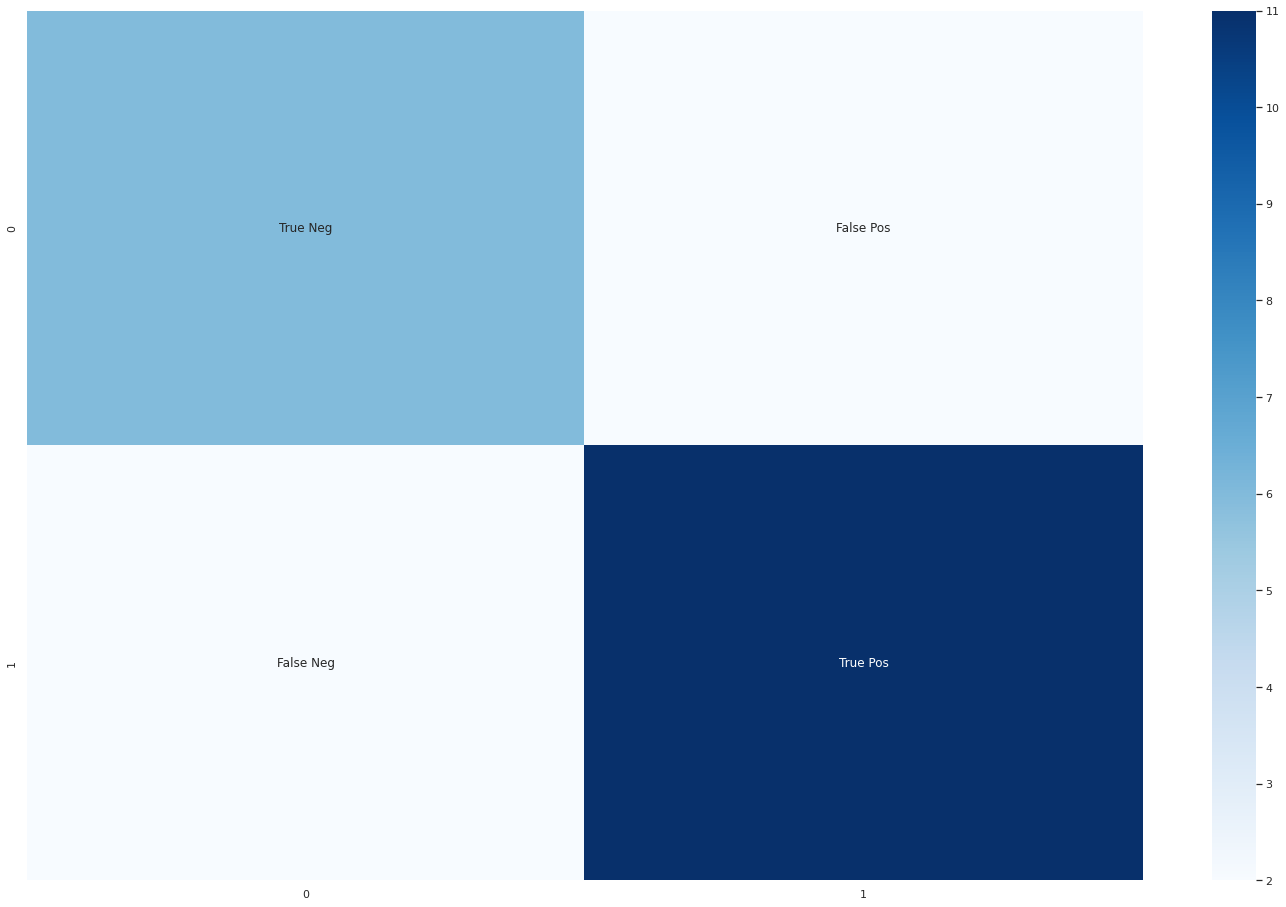

In [84]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_new, annot=labels, fmt='', cmap='Blues')

Se mejora el modelo y sus predicciones para cada tipo de clasificación. 

# Realizamos una gráfica ROC y comparamos

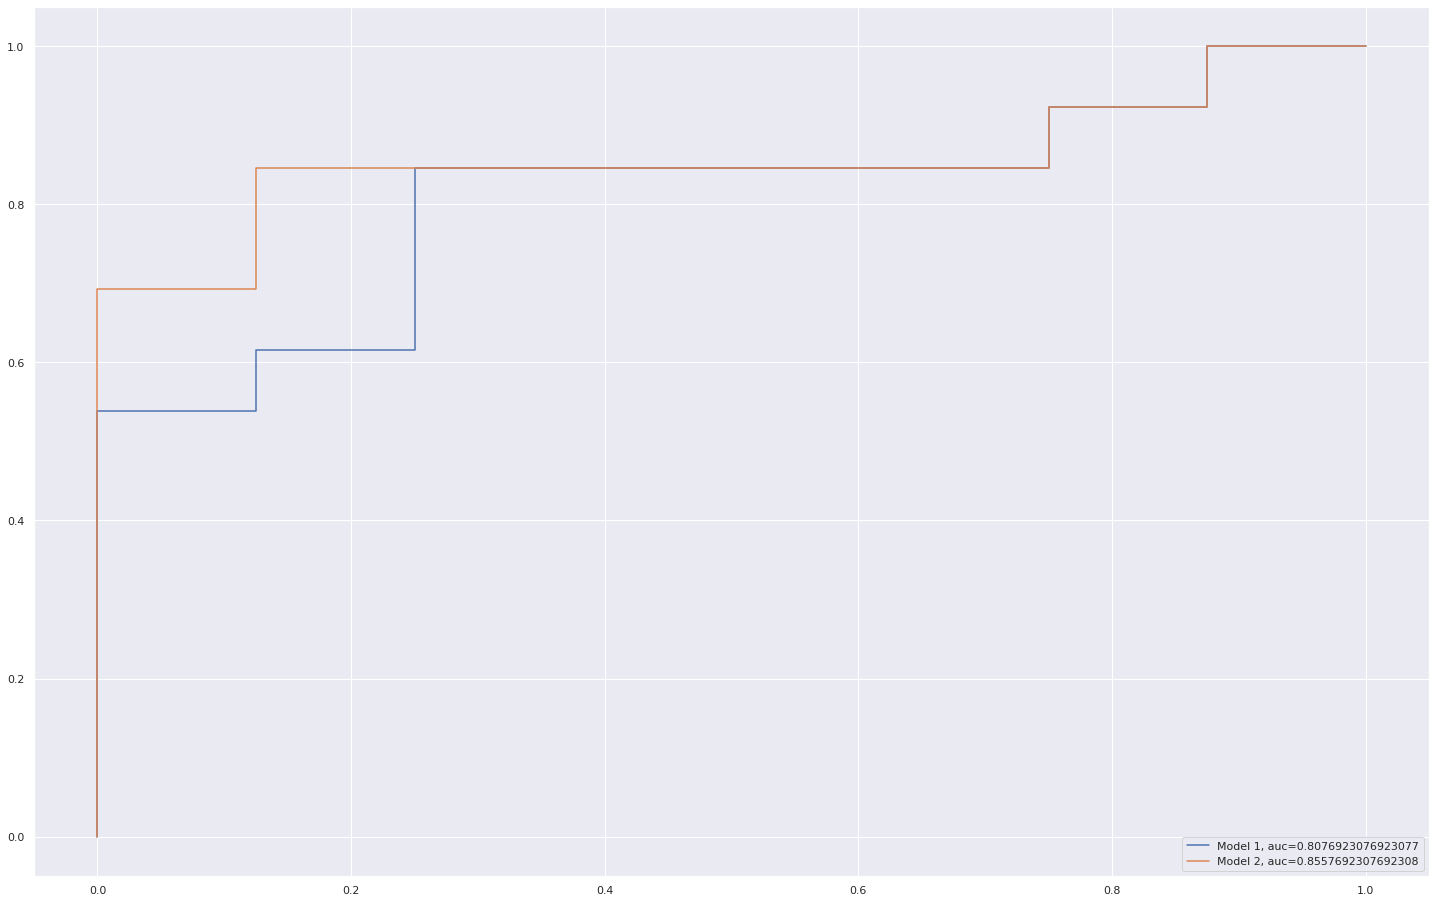

In [85]:
y_pred_proba_new = lg_model_final.predict_proba(x_new_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_new_test,  y_pred_proba_new)
auc2 = metrics.roc_auc_score(y_new_test, y_pred_proba_new)

plt.plot(fpr,tpr,label="Model 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot(fpr2,tpr2,label="Model 2, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

La puntuación AUC para el caso es 0,85, una mejora de 5% en comparación del modelo anterior. La puntuación AUC 1 representa un clasificador perfecto y 0,5 representa un clasificador sin valor.

In [86]:
mse_new, bias_new, variance_new = bias_variance_decomp(lg_model_final, x_new_train, y_new_train, x_new_test, y_new_test, 
                                           loss='mse', num_rounds=200, random_seed=None)
print("Model 1: Average Bias : ", bias)
print("Model 1: Average Variance : ", variance)

print("Model 2: Average Bias : ", bias_new)
print("Model 2: Average Variance : ", variance_new)

Model 1: Average Bias :  0.1900583333333333
Model 1: Average Variance :  0.14494166666666666
Model 2: Average Bias :  0.15202261904761907
Model 2: Average Variance :  0.13916785714285718


Vemos que **el bias en general disminuyo** y que **no existió mucho cambio en la varianza**. Sin embargo, mejoro bastante el modelo en cuanto a precisión. (10 decimas). 

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(x_new_train, y_new_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=50, random_state=1234,
                   solver='newton-cg')


In [90]:
from sklearn.metrics import f1_score
y_pred_tune = logModel_grid.predict(x_new_test)
print(f1_score(y_new_test, y_pred_tune), ":Valor f1 con GridSearchCV")
print(f1_score(y_new_test, lg_pred_final) "Valor f1 original")

0.7826086956521738 : is the f1 score
0.8461538461538461


Se realizó un GridSearch con ayuda de la librería de scikit learn para él tuneo de hiperparámetros; sin embargo, no mejoro el modelo. 

# Referencias

Gusarov, M. (2022, 24 abril). Do I need to tune logistic regression hyperparameters? Medium. Recuperado 12 de septiembre de 2022, de https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69